In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
meds = []

for i in range(1, 11):
    meds.append(np.loadtxt(f"0606/med{i}.txt", delimiter=","))
    

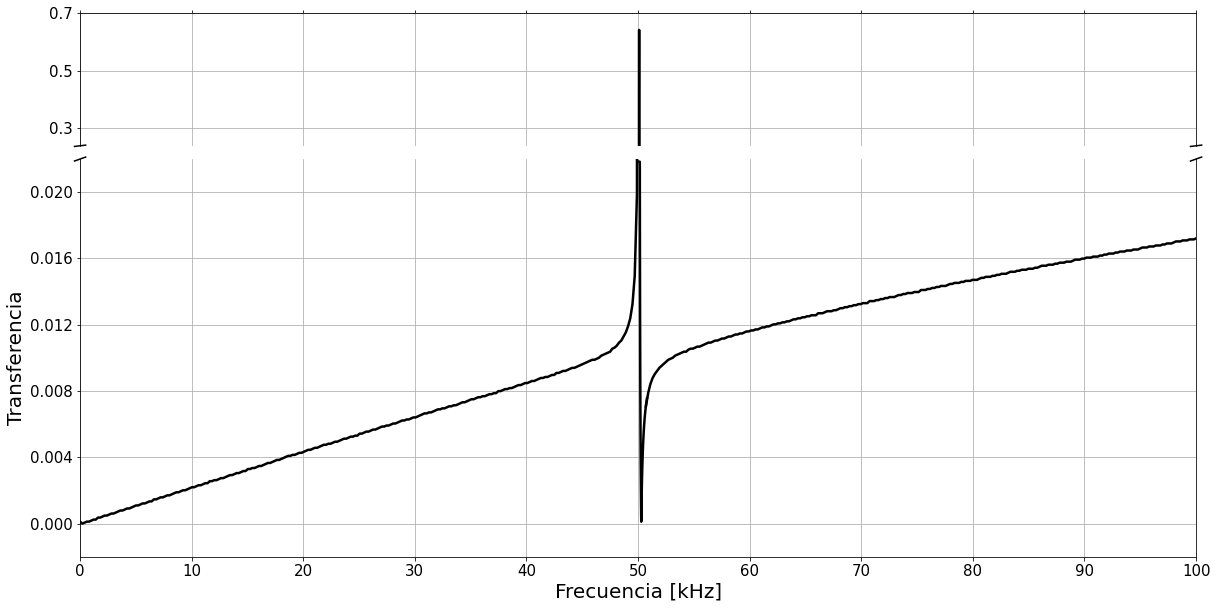

In [26]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,10), gridspec_kw={"height_ratios" : [1,3]})
fig.subplots_adjust(hspace=0.05)

frec = meds[9][:,0]
r = meds[9][:,1]

khz = 1000

#ax1.plot(frec, r, '-k', linewidth=2)
ax2.plot(frec[:251]/khz, 2*r[:251]/1, '-k', linewidth=2.5)
ax1.plot(meds[7][:,0]/khz, 2*meds[7][:,1]/1, "-k", linewidth=2.5)
ax2.plot(meds[1][:,0]/khz, 2*meds[1][:,1]/1, '-k', linewidth=2.5)
ax2.plot(frec[253:]/khz, 2*r[253:]/1, '-k', linewidth=2.5)



ax1.set_ylim(2*0.12, 2*0.35)
ax2.set_ylim(-2*0.001, 2*0.011)

ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
ax1.set_xticks(np.arange(0,110000/khz,10000/khz))
ax2.set_xticks(np.arange(0,110000/khz,10000/khz))
ax1.set_xlim([0,100000/khz])
ax2.set_xlim([0, 100000/khz])
ax1.set_yticks([2*0.15,2*0.25,2*0.35])
ax2.set_yticks(np.arange(0, 2*0.012, 2*0.002))
ax1.tick_params(labelsize=15 ,labeltop=False)
ax2.tick_params(labelsize=15)

d = 0.005

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
ax1.grid()
ax2.grid()

#ax1.set_title("Transferencia", fontsize=25)
ax2.set_xlabel("Frecuencia [kHz]", fontsize=20)
ax2.set_ylabel("Transferencia", fontsize=20)

plt.show()

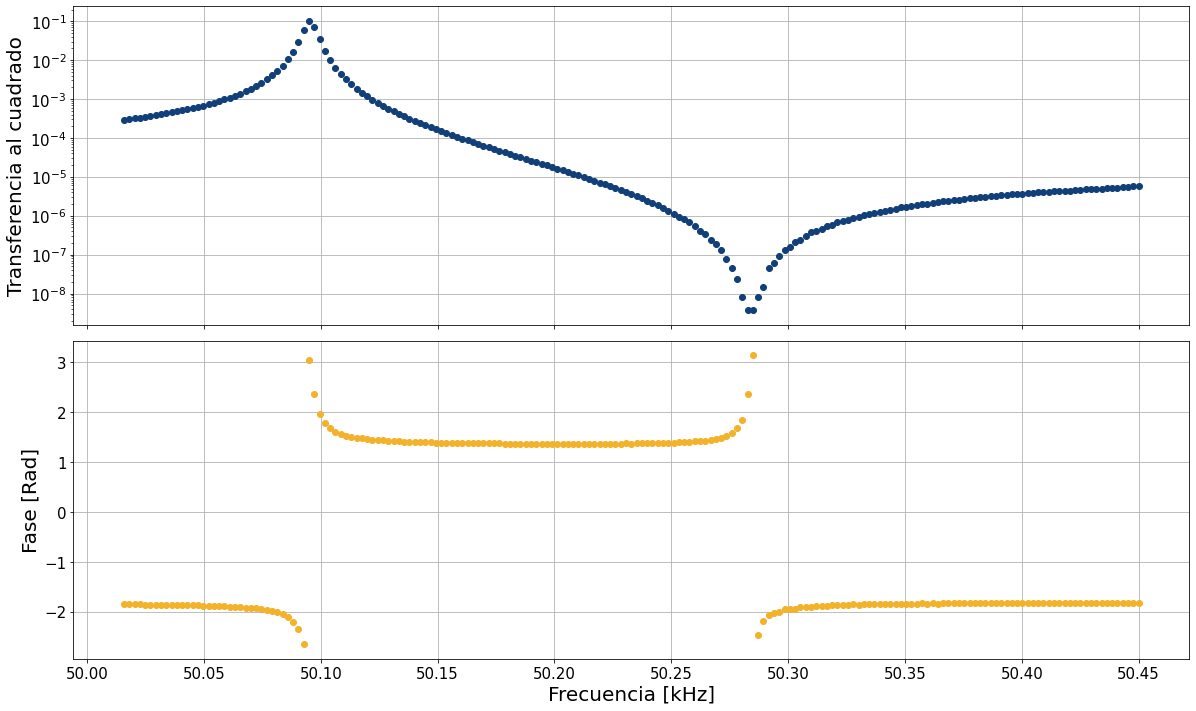

In [27]:
%matplotlib inline

#plt.style.use("default")

fig, (axr, axt) = plt.subplots(2, figsize=(20,12), sharex=True)
fig.subplots_adjust(hspace=0.05)

n=4
frecs = meds[n][7:,0]/1000
rs = meds[n][7:,1]
ts = meds[n][7:,2]*2*np.pi/360

axr.plot(frecs, rs**2, 'o', c="#103f79",linewidth=2)
axr.set_yscale("log")
axr.set_ylabel("Transferencia al cuadrado", fontsize=20)
axr.tick_params(labelsize=15)
axr.grid()

axt.plot(frecs, ts, 'o', c="#f3b229")
axt.set_xlabel("Frecuencia [kHz]", fontsize=20)
axt.set_ylabel("Fase [Rad]", fontsize=20)
axt.tick_params(labelsize=15)
axt.set_xticks(np.arange(50, 50.5, 0.05))
axt.grid()

plt.show()

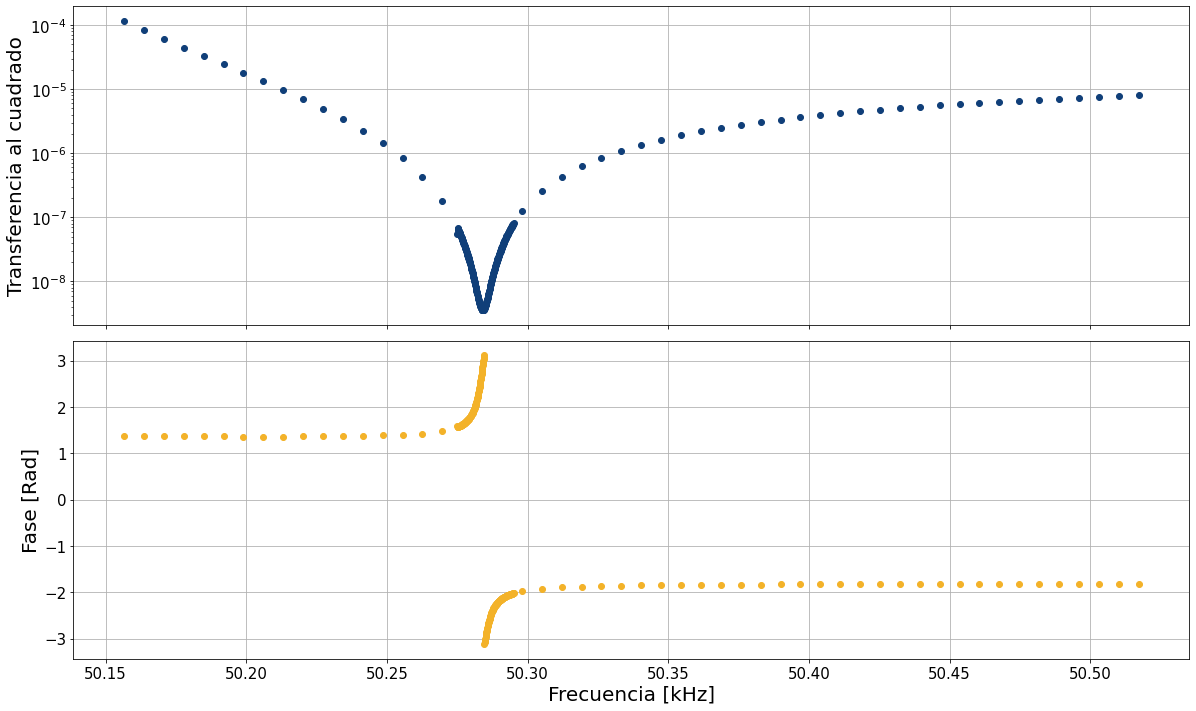

In [28]:
%matplotlib inline

#plt.style.use("default")

fig, (axr, axt) = plt.subplots(2, figsize=(20,12), sharex=True)
fig.subplots_adjust(hspace=0.05)

n=1
frecs = meds[n][8:60,0]/1000
rs = meds[n][8:60,1]
ts = meds[n][8:60,2]*2*np.pi/360

n2 = 5
frecs2 = meds[n2][:,0]/1000
r2 = meds[n2][:,1]
t2 = meds[n2][:,2]*2*np.pi/360

axr.plot(frecs2, r2**2, 'o', c="#103f79")
axr.plot(frecs, rs**2, 'o', c="#103f79",linewidth=2)
axr.set_yscale("log")
axr.set_ylabel("Transferencia al cuadrado", fontsize=20)
axr.tick_params(labelsize=15)
axr.grid()

axt.plot(frecs2, t2, 'o', c="#f3b229")
axt.plot(frecs, ts, 'o', c="#f3b229")
axt.set_xlabel("Frecuencia [kHz]", fontsize=20)
axt.set_ylabel("Fase [Rad]", fontsize=20)
axt.tick_params(labelsize=15)
#axt.set_xticks(np.arange(50, 50.5, 0.05))
axt.grid()

plt.show()

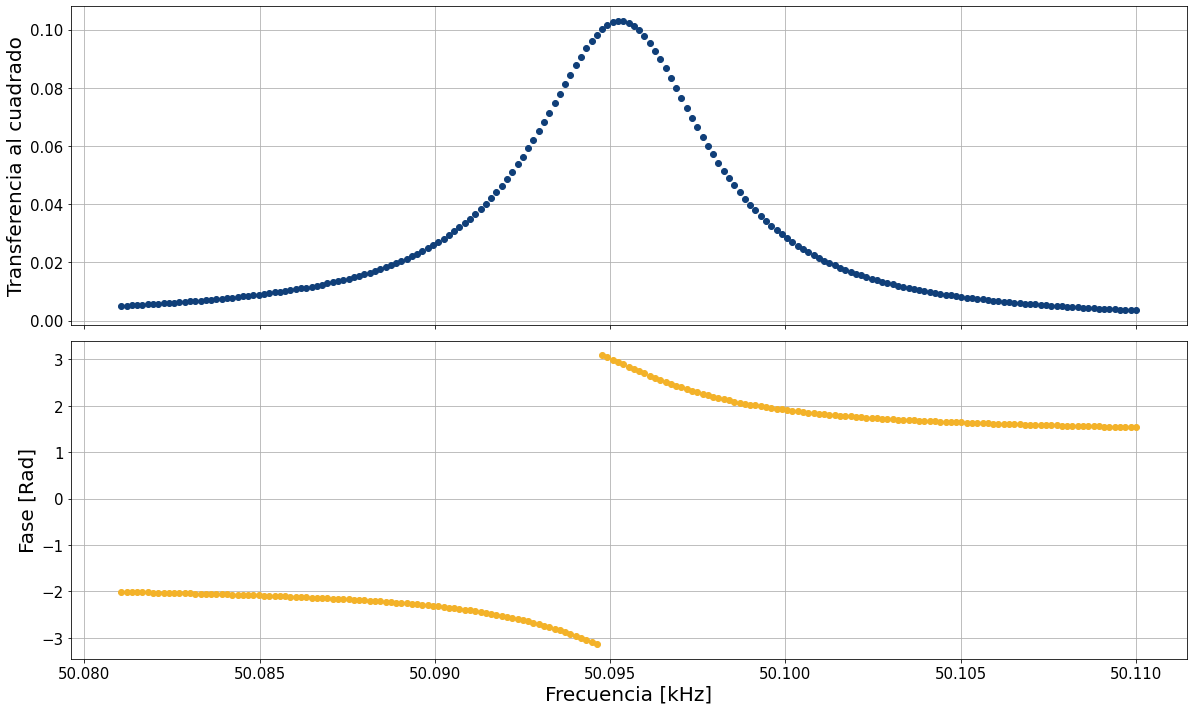

In [29]:
%matplotlib inline

#plt.style.use("default")

fig, (axr, axt) = plt.subplots(2, figsize=(20,12), sharex=True)
fig.subplots_adjust(hspace=0.05)

n=7
frecs = meds[n][7:,0]/1000
rs = meds[n][7:,1]
ts = meds[n][7:,2]*2*np.pi/360

axr.plot(frecs, rs**2, 'o', c="#103f79",linewidth=2)
#axr.set_yscale("log")
axr.set_ylabel("Transferencia al cuadrado", fontsize=20)
axr.tick_params(labelsize=15)
axr.set_xticks(np.arange(50.080, 50.110, 0.005))
axr.grid()

axt.plot(frecs, ts, 'o', c="#f3b229")
axt.set_xlabel("Frecuencia [kHz]", fontsize=20)
axt.set_ylabel("Fase [Rad]", fontsize=20)
axt.tick_params(labelsize=15)
axt.set_xticks(np.arange(50.080, 50.110, 0.005))
axt.grid()

plt.show()

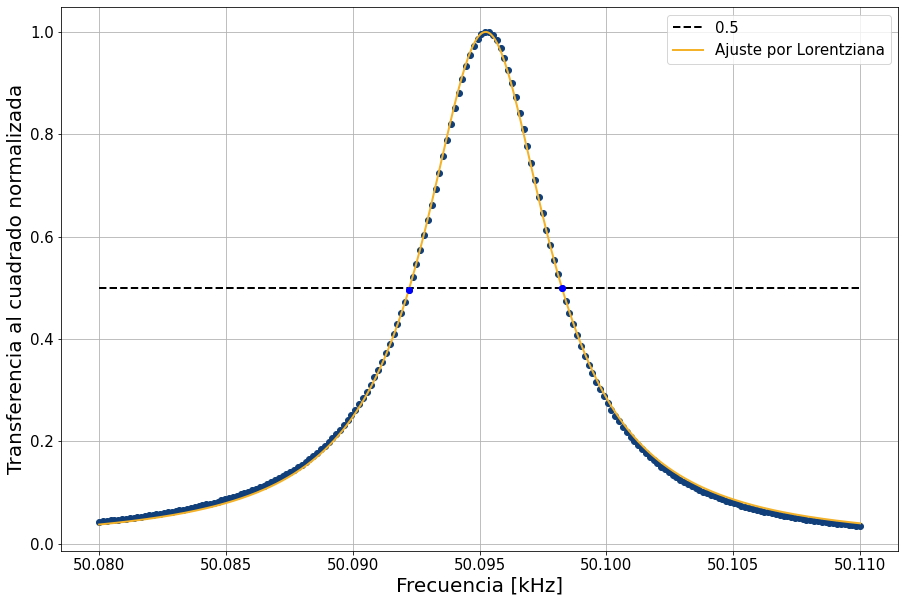

parámetros fit: 50.09523900687941 8332.190663957439 4.932112060084506e-06 13.837328910644159
[50.09221106 50.09824121]
0.006030150753765895
8307.460468644898
0.15000000000000568
a mano: 165.83333333341443


In [31]:
from scipy.optimize import curve_fit

def lorenziana(x,x0,q):
    s = 1j * x
    y = (s*x0/q)/(x0**2 + s**2 + (s*x0/q))
    return np.abs(y)**2

n=7
frecs = meds[n][:,0]/1000
rs = meds[n][:,1]
rs2 = 4*rs**2 / max(4*rs**2)
ts = meds[n][:,2]*2*np.pi/360
x0_index = np.where(rs == max(rs))
x0 = frecs[x0_index][0]

(x0_fit, q_fit), pcov = curve_fit(lorenziana, frecs, rs2, p0 = [x0, 10000])
perr = np.sqrt(np.diag(pcov))

frecs_fit = np.linspace(50.080, 50.110, 500)

fit_lorentz = lorenziana(frecs_fit, x0_fit, q_fit)


fig, ax = plt.subplots(1, figsize=(15,10))

ax.plot([50.08, 50.110], [max(rs2)/2, max(rs2)/2], linestyle="dashed", linewidth=2, c="k", label="0.5")
ax.plot(frecs, rs2, 'o', c="#103f79")
ax.plot(frecs_fit, fit_lorentz, c="#f3b229", linewidth=2, label="Ajuste por Lorentziana")
ax.set_xlabel("Frecuencia [kHz]", fontsize=20)
ax.set_ylabel("Transferencia al cuadrado normalizada", fontsize=20)
ax.tick_params(labelsize=15)
ax.grid()

ax.legend(fontsize=15)


ax.plot(frecs[abs(rs2 -0.5) <= 0.01], rs2[abs(rs2 -0.5) <= 0.01], 'ob')
plt.show()

print("parámetros fit:",x0_fit, q_fit, perr[0],perr[1])
p1 = max(frecs[abs(rs2 - 0.5) <= 0.01])
p2 = min(frecs[abs(rs2 -0.5) <= 0.01])
Q_amano = 1 / (max(frecs[abs(rs2 -0.5) <= 0.01]) - min(frecs[abs(rs2 -0.5) <= 0.01]))
print(frecs[abs(rs2 -0.5) <= 0.01])
print(p1 - p2)
print(x0_fit/(p1-p2))
print(1000*(max(frecs)-min(frecs))/len(frecs))
print("a mano:", Q_amano)

Propagación de error de el factor de calidad medido "a mano"

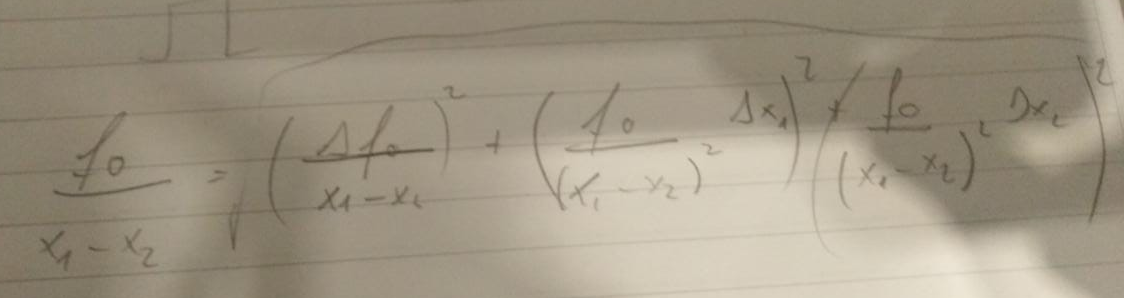

In [19]:
DX = p1*1000 - p2*1000
f0 = max(frecs[rs2 == max(rs2)])*1000
df0 = 0.15

t1 = df0 / DX
t2 = (f0 * df0) / (DX**2)
t3 = (f0 * df0) / (DX**2) 
Q_mano_err = np.sqrt(t1**2 + t2**2 + t3**2)
print("Q a mano:", f0/DX, Q_mano_err)


Q a mano: 8307.458333337161 292.24444212466676
